In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage, dendrogram
import scipy.cluster.hierarchy as sch

from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

import missingno as msno
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

from itertools import combinations
from collections import Counter



In [2]:
df = pd.read_csv("../tables/sales_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   FaturaNo      541909 non-null  object 
 1   StokKodu      541909 non-null  object 
 2   UrunAdi       541909 non-null  object 
 3   Miktar        541909 non-null  int64  
 4   FaturaTarihi  541909 non-null  object 
 5   BirimFiyat    541909 non-null  float64
 6   MusteriID     406829 non-null  float64
 7   Sehir         541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.describe()

,Miktar,BirimFiyat,MusteriID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
df.isnull().sum()

FaturaNo             0
StokKodu             0
UrunAdi              0
Miktar               0
FaturaTarihi         0
BirimFiyat           0
MusteriID       135080
Sehir                0
dtype: int64

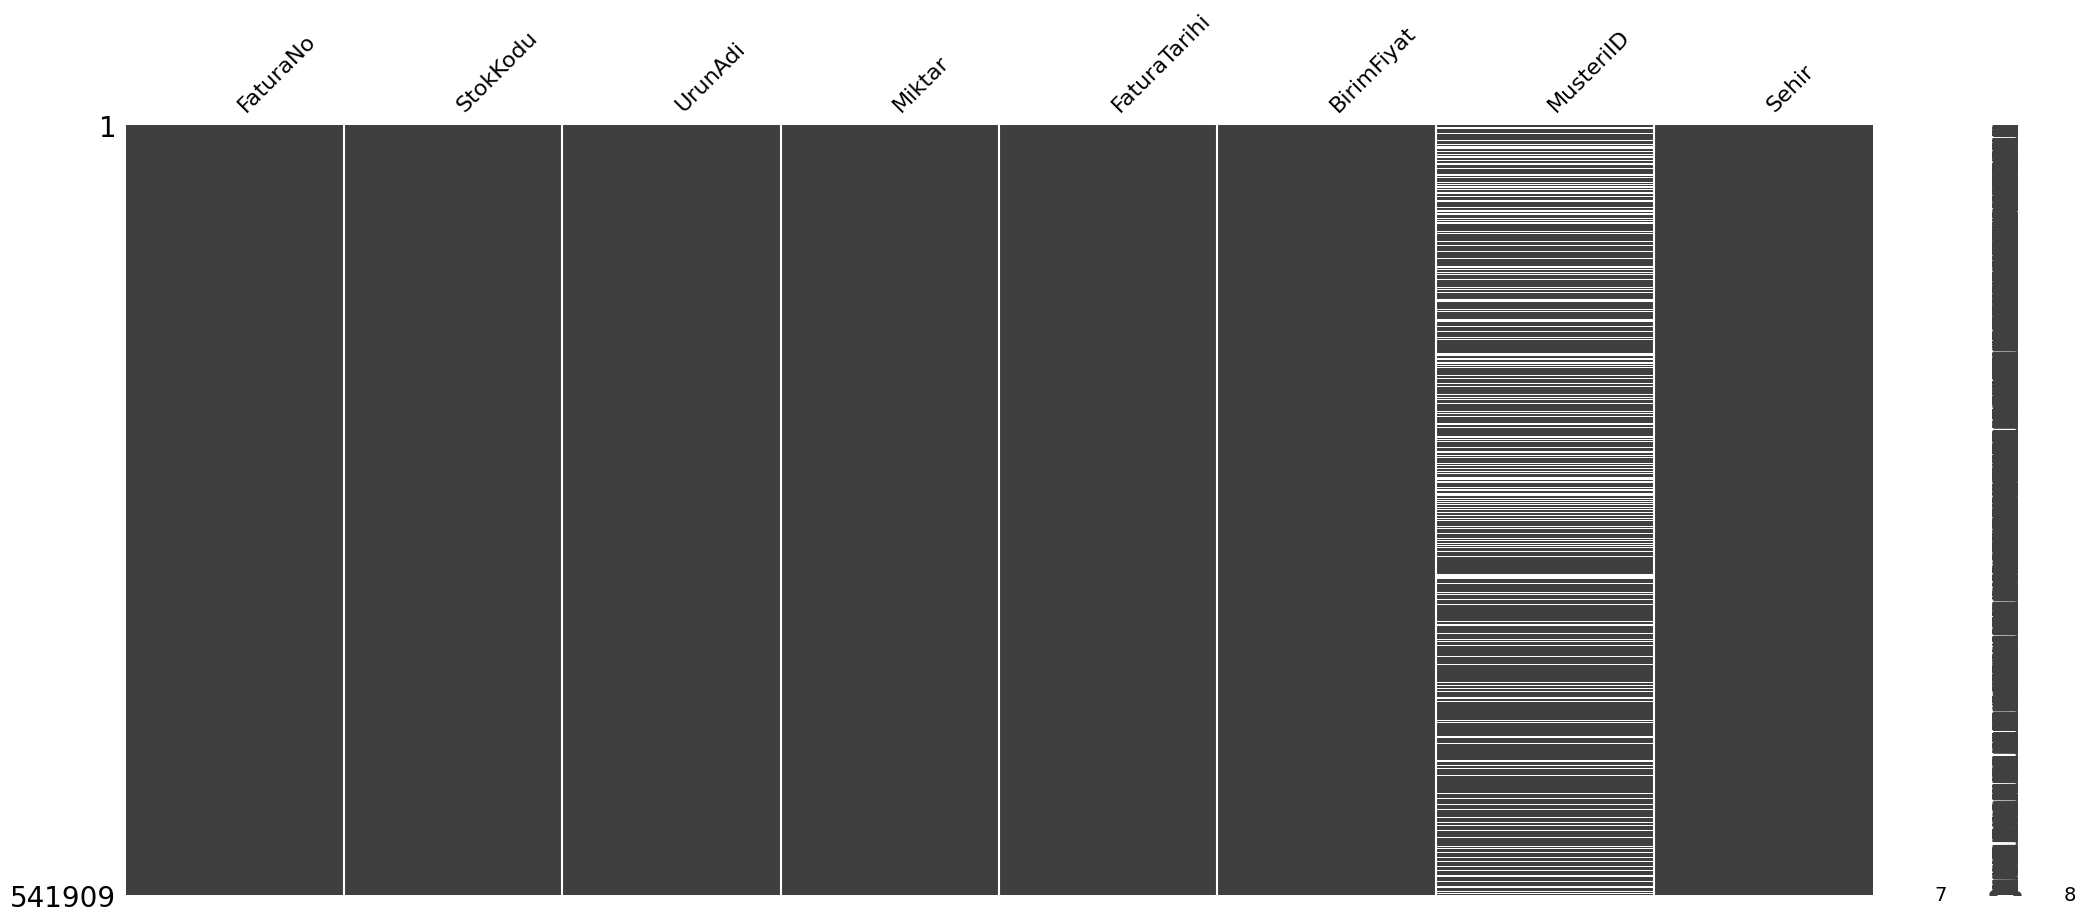

In [6]:
msno.matrix(df)
plt.show()

In [7]:
df['FaturaTarihi'] = pd.to_datetime(df['FaturaTarihi'])

In [8]:
df['MusteriTipi'] = np.where(df['MusteriID'].isna(), 'Anonim', 'Bireysel')

In [9]:
# StokKodu içinde herhangi bir harf olanları filtrele
stok_kodu_harfli = df[df['StokKodu'].str.contains('[A-Za-z]', na=False)]
stok_kodu_harfli[['StokKodu']].drop_duplicates()

# stok_kodu_harfli içerisindeki StokKodu'nun son harfi unique olarak say ve adetlerini göster
stok_kodu_harfli['harf'] = stok_kodu_harfli['StokKodu'].str.extract(r'([A-Za-z]+)$')
harf_sayilari = stok_kodu_harfli['harf'].value_counts()
harf_sayilari

# StokKodu içinde herhangi bir harf olanları filtrele
#  harf_sayilari'nda görünen harflere sahip stok kodlarını "StokKoduEtiketi" olarak tabloya yaz
harfler = harf_sayilari.index.tolist()
df['StokKoduEtiketi'] = df['StokKodu'].apply(
    lambda x: next((harf for harf in harfler if str(x).endswith(harf)), 'Normal')
)

unique_stok_kodu_etiketi_count = df['StokKoduEtiketi'].nunique()

C:\Users\Deniz.Doktur\AppData\Local\Temp\ipykernel_24524\1470568114.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stok_kodu_harfli['harf'] = stok_kodu_harfli['StokKodu'].str.extract(r'([A-Za-z]+)$')


In [10]:
df[['Boyut', 'Renk', 'Urun']] = df['UrunAdi'].str.split(' ', n=2, expand=True)

In [11]:
df['ToplamTutar'] = df['Miktar'] * df['BirimFiyat']

In [12]:
bireysel_musteriler = df[df["MusteriTipi"] == "Bireysel"]
# bireysel_musteriler.to_csv('../tables/BireyselMusteriler.csv', index=False)

anonim_musteriler = df[df["MusteriTipi"] == "Anonim"]
# anonim_musteriler.to_csv('../tables/AnonimMusteriler.csv', index=False)


In [ ]:
# "UrunAdi" sütunundaki son kelimeyi alarak ve yeni bir sütun olarak ekliyoruz.
df["SonKelime"] = df["UrunAdi"].astype(str).str.strip().str.split().str[-1]
urun_adlari = df["SonKelime"].astype(str)

vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(urun_adlari)

# Optimum Küme sayısını belirliyoruz.
kume_sayisi = 125
kmeans = KMeans(n_clusters=kume_sayisi, random_state=42)
df["KategoriEtiketi"] = kmeans.fit_predict(X)

# Her kategoriden 3 örnek gösteriyoruz.
for i in range(kume_sayisi):
    print(f"\nKategori {i}:")
    print(df[df["KategoriEtiketi"] == i]["SonKelime"].head(3).to_string(index=False))
df = df.drop(columns=["KategoriEtiketi"])


Kategori 0:
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu
kutusu


In [14]:
df["UrunKategorisi"] = df["SonKelime"]

df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bdökücü\b", "Tüy Dökücü", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bajanda\b", "Günlük Ajanda", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\banahtarlık\b", "Anahtarlık", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bAnahtarlık\b", "Anahtarlık", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\baparatı\b", "Silikon Yüz Temizleme Aparatı", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\baskı\b", "Pratik Portatif Askı", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\baynası\b", "Ayna", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bayna\b", "Ayna", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bbalmı\b", "Parlak Dudak Balmı", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bbandanası\b", "Bebek Bandanası", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bbandı\b", "Saç Bandı", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bbant\b", "Şeffaf Bant", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bbardak\b", "Bardak", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bbileklik\b", "Bileklik", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bbonesi\b", "Saç Kurutma Bonesi", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bbroş\b", "Ay Yıldızlı Broş", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bbuzluk\b", "Silikon Buzluk", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bcüzdanı\b", "Seyahat Cüzdanı", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bçanta\b", "Çanta", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bçantası\b", "Çanta", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bçerçevesi\b", "Çerçeve", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bçıkartma\b", "Çıkartma", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bçıkartması\b", "Çıkartma", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bçırpıcı\b", "Pratik Çırpıcı", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bÇorap\b", "Çorap", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bçorap\b", "Çorap", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bçorabı\b", "Çorap", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bdefter\b", "Defter", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bdefteri\b", "Defter", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bdekor\b", "Dekor", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bdekoru\b", "Dekor", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bdüzenleyici\b", "Düzenleyici", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\beldiven\b", "Eldiven", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\beldiveni\b", "Eldiven", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\beyeliner\b", "Simli Eyeliner", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bfan\b", "Masaüstü Mini Fan", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bfırçalık\b", "Diş Fırçalık", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bfigürü\b", "Figür", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bharf\b", "Ahşap Dekoratif Harf", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bhavuzu\b", "Mini Süs Havuzu", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bhoparlör\b", "Mini Hoparlör", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bışık\b", "Işık", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bışığı\b", "Işık", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bkabı\b", "Evcil Hayvan Mama Kabı", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bkağıdı\b", "Kağıt", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bkağıtlık\b", "Ahşap Doku Kağıtlık", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bkalem\b", "Kalem", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bkalemliş\b", "Kalemlik", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bkalemtıraş\b", "Kalemtıraş", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bkalıbı\b", "Kalıp", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bkanca\b", "Yapışkanlı Kanca", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bkapağı\b", "Silikon Kavanoz Kapağı", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bkartlık\b", "Kartlık", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bkase\b", "Kase", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bkavanozu\b", "Saklama Kavanozu", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bkılıfı\b", "Tatil Temalı Yastık Kılıfı", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bkitabı\b", "Mandala Boyama Kitabı", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bklasörü\b", "Dosya Klasörü", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bkupa\b", "Kupa", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bkutu\b", "Kutu", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bkutusu\b", "Kutu", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bküresi\b", "Kar Küresi", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\blambası\b", "Lamba", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\blensi\b", "Lens", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bmagneti\b", "Buzdolabı Magneti", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bmakas\b", "Mini Katlanabilir Makas", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bmakinesi\b", "Mini Dikiş Makinesi", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bmum\b", "Mum", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bnemlendirici\b", "Mini Nemlendirici", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bnotluk\b", "Mini Notluk", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\borganizer\b", "Organizer", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\borganizer'ı\b", "Organizer", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\borganizeri\b", "Organizer", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\boyuncak\b", "Oyuncak", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\boyuncağı\b", "Oyuncak", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\börtüsü\b", "Masa Örtüsü", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bpad\b", "Mouse Pad", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bpaketi\b", "Sticker", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bpanosu\b", "Duvar Panosu", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bpeçete\b", "Meyve Baskılı Peçete", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bpeçetelik\b", "Ahşap Peçetelik", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bpedi\b", "Kedi Tırmalama Pedi", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bpipet\b", "Cam Pipet", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bposter\b", "Poster", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bposteri\b", "Poster", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bpoşeti\b", "Poşet", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\braf\b", "Raf", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\brafı\b", "Raf", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\brunner\b", "Runner", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\brunner'ı\b", "Runner", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bsaat\b", "Saat", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bsaati\b", "Saat", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bsabun\b", "Sabun", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bsabunluk\b", "Bambu Sabunluk", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bseti\b", "Set", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bstandı\b", "Telefon Standı", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bsticker\b", "Sticker", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bstoperi\b", "Kapı Stoperi", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bsüngeri\b", "Makyaj Süngeri", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bsüpürgesi\b", "Süpürge", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bsüs\b", "Süs", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bsüslemesi\b", "Yılbaşı Süslemesi", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bsüsü\b", "Süs", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bşişesi\b", "Şişe", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bt-shirt\b", "Oversize T-Shirt", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\btablo\b", "Tablo", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\btahtası\b", "Mutfak Kesme Tahtası", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\btakvim\b", "Takvim", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\btasması\b", "Evcil Hayvan Tasması", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\btaş\b", "Aromatik Taş", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bteli\b", "Mandallı Fotoğraf Teli", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\btemizleyici\b", "Süngerli Makyaj Temizleyici", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\btepsi\b", "Ahşap Tepsi", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bterliği\b", "Ev Terliği", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\btermometre\b", "Dijital Termometre", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\btokası\b", "Toka", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\btoka\b", "Toka", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\btorbası\b", "Torba", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\btripod\b", "Mini Tripod", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\btutucu\b", "Tutucu", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bvantilatör\b", "Vantilatör", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\byapıştırıcısı\b", "Yapıştırıcı", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\byastık\b", "Yumuşak Yastık", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\byüzük\b", "Taşlı Yüzük", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bzamanlayıcısı\b", "Mutfak Zamanlayıcısı", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bzımba\b", "Zımbasız Zımba", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bzinciri\b", "Işık", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bfırçası\b", "Bulaşık Fırçası", case=False, regex=True)
df["UrunKategorisi"] = df["UrunKategorisi"].str.replace(r"\bkalemlik\b", "Şeffaf Kalemlik", case=False, regex=True)
df = df.drop(columns=["SonKelime"])

In [15]:
df = df.rename(columns={"UrunKategorisi": "UrunTipi"})

In [16]:
max_date = bireysel_musteriler["FaturaTarihi"].max()

rfm = df.groupby("MusteriID").agg({
    "FaturaTarihi": lambda x: (max_date - x.max()).days,  # Recency
    "FaturaNo": pd.Series.nunique,                  # Frequency
    "ToplamTutar": "sum"                            # Monetary
}).reset_index()

# 7. Kolon isimlerini düzelt
rfm.columns = ["MusteriID", "Recency", "Frequency", "Monetary"]


In [17]:
rfm["R_Skor"] = pd.qcut(rfm["Recency"], 5, labels=[5, 4, 3, 2, 1])

# Frequency: çok fatura = daha iyi → en yükseğe 5
rfm["F_Skor"] = pd.qcut(rfm["Frequency"].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

# Monetary: çok harcama = daha iyi → en yükseğe 5
rfm["M_Skor"] = pd.qcut(rfm["Monetary"], 5, labels=[1, 2, 3, 4, 5])

# Skorları sayısala çevir
rfm["R_Skor"] = rfm["R_Skor"].astype(int)
rfm["F_Skor"] = rfm["F_Skor"].astype(int)
rfm["M_Skor"] = rfm["M_Skor"].astype(int)

# Toplam skor
rfm["RFM_Skor"] = rfm["R_Skor"] + rfm["F_Skor"] + rfm["M_Skor"]


In [18]:
rfm_features = rfm[["Recency", "Frequency", "Monetary"]]

scaler = MinMaxScaler() 
rfm_scaled = scaler.fit_transform(rfm_features)

# DataFrame olarak dönüştür
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=["Recency", "Frequency", "Monetary"])

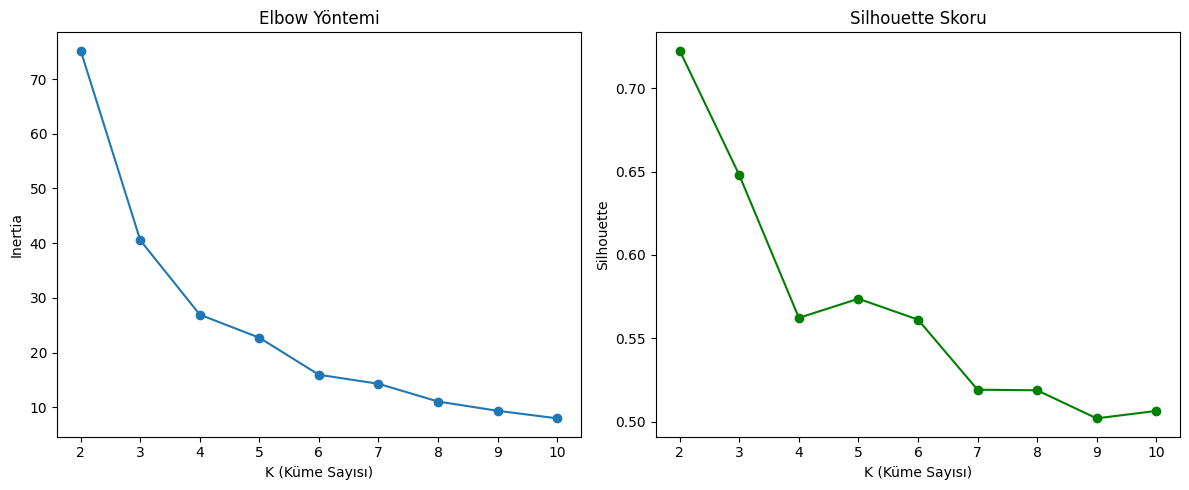

In [19]:
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled_df)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(rfm_scaled_df, kmeans.labels_))

# Görselleştir
plt.figure(figsize=(12,5))

# Elbow grafiği
plt.subplot(1, 2, 1)
plt.plot(K, inertia, marker='o')
plt.title('Elbow Yöntemi')
plt.xlabel('K (Küme Sayısı)')
plt.ylabel('Inertia')

# Silhouette grafiği
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Skoru')
plt.xlabel('K (Küme Sayısı)')
plt.ylabel('Silhouette')

plt.tight_layout()
plt.show()

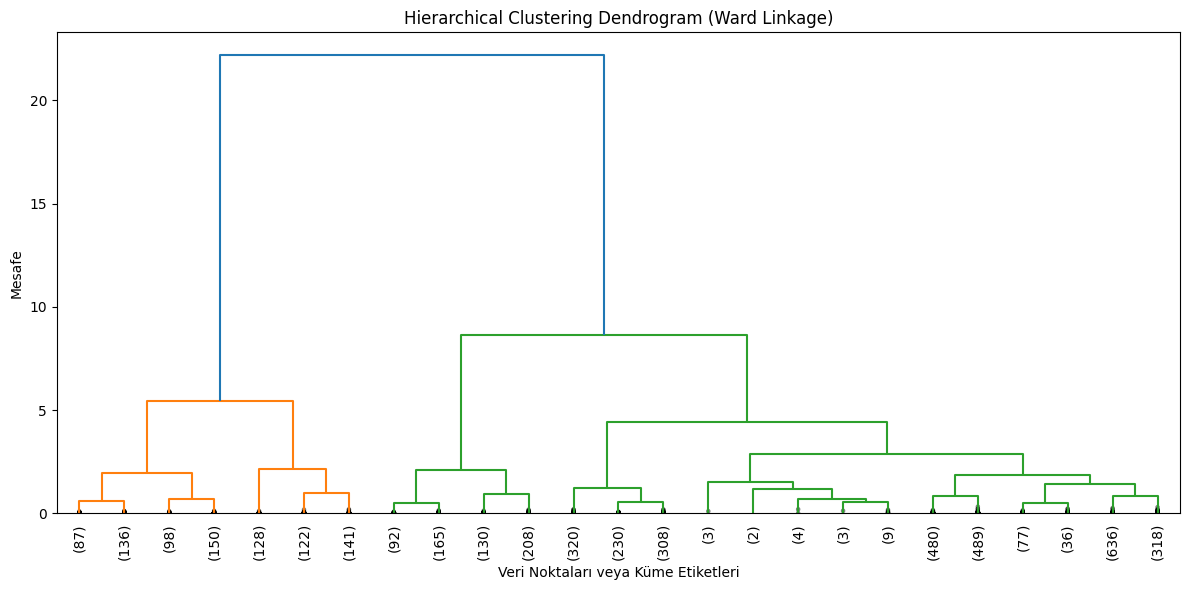

In [20]:
linked = linkage(rfm_scaled_df, method='ward')

# Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=25, leaf_rotation=90, leaf_font_size=10, show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('Veri Noktaları veya Küme Etiketleri')
plt.ylabel('Mesafe')
plt.tight_layout()
plt.show()

In [21]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm["KumeEtiketi"] = kmeans.fit_predict(rfm_scaled_df)
rfm['KumeEtiketi'] = rfm['KumeEtiketi'].astype(int)

rfm.to_csv('Recency_Frequency_Monetary.csv', index=False)



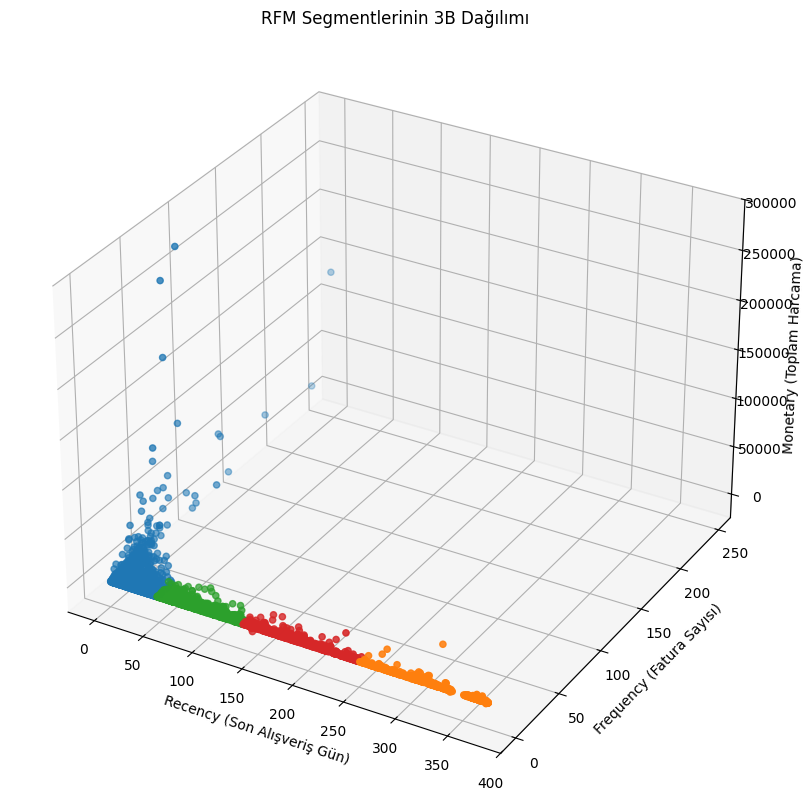

In [22]:
cluster_colors = {
    0: '#1f77b4',  # Blue
    1: '#ff7f0e',  # Orange
    2: '#2ca02c',  # Green
    3: '#d62728'   # Red 
}

# Her müşterinin kümesine göre rengi
colors = rfm['KumeEtiketi'].map(cluster_colors)

# 3D grafik çizimi
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(
    rfm["Recency"],
    rfm["Frequency"],
    rfm["Monetary"],
    c=colors,
    marker='o'
)

ax.set_xlabel("Recency (Son Alışveriş Gün)")
ax.set_ylabel("Frequency (Fatura Sayısı)")
ax.set_zlabel("Monetary (Toplam Harcama)")
ax.set_title("RFM Segmentlerinin 3B Dağılımı")

plt.show()

In [23]:
rfm['KumeEtiketi'] = rfm['KumeEtiketi'].replace({
    0: 'VIP',
    1: 'Orta Segment',
    2: 'Pasif',
    3: 'Kaybedilmiş'
})

In [24]:
# Her müşterinin ilk alışveriş yaptığı tarihi bul ve yeni bir sütun olarak ekle
ilk_alisveris = df.groupby("MusteriID")["FaturaTarihi"].min()
df["IlkAlisverisTarihi"] = df["MusteriID"].map(ilk_alisveris)

# Her müşterinin son alışveriş yaptığı tarihi bul ve yeni bir sütun olarak ekle
son_alisveris = df.groupby("MusteriID")["FaturaTarihi"].max()
df["SonAlisverisTarihi"] = df["MusteriID"].map(son_alisveris)

# Her müşterinin toplam unique fatura sayısını hesapla ve yeni bir sütun olarak ekle
fatura_sayilari = df.groupby("MusteriID")["FaturaNo"].nunique()
df["ToplamFaturaSayisi"] = df["MusteriID"].map(fatura_sayilari)

# FaturaTarihi'nden ay bilgisini alıp mevsim sütunu ekle
def ay_to_mevsim(ay):
    if ay in [12, 1, 2]:
        return "Kış"
    elif ay in [3, 4, 5]:
        return "İlkbahar"
    elif ay in [6, 7, 8]:
        return "Yaz"
    else:
        return "Sonbahar"

df["Mevsim"] = df["FaturaTarihi"].dt.month.apply(ay_to_mevsim)

# Haftanın gününü almak için yeni bir sütun ekle
df["HaftaGunu"] = df["FaturaTarihi"].dt.day_name(locale='tr_TR')

# Her müşterinin iptal edilen fatura sayısını hesapla (FaturaNo başında 'C' olanlar)
iptal_fatura_sayilari = df[df["FaturaNo"].str.startswith("C")].groupby("MusteriID")["FaturaNo"].nunique()
df["IptalFaturaSayisi"] = df["MusteriID"].map(iptal_fatura_sayilari).fillna(0).astype(int)

# Saat aralığı fonksiyonu
def saat_araligi(dt):
    saat = dt.hour
    if 6 <= saat < 12:
        return "Sabah (06:00-12:00)"
    elif 12 <= saat < 18:
        return "Öğlen (12:00-18:00)"
    elif 18 <= saat < 24:
        return "Akşam (18:00-24:00)"
    else:
        return "Gece (00:00-06:00)"

df["SaatAraligi"] = df["FaturaTarihi"].apply(saat_araligi)

In [25]:
clustering = df.copy()
clustering = clustering[clustering["MusteriTipi"] != "Anonim"]

In [ ]:
clustering.loc[clustering["UrunTipi"] == "Oyuncak", "kategori"] = "Oyuncak & Hobi"
clustering.loc[clustering["UrunTipi"] == "Mandallı Fotoğraf Teli", "kategori"] = "Oyuncak & Hobi"
clustering.loc[clustering["UrunTipi"] == "Figür", "kategori"] = "Oyuncak & Hobi"
clustering.loc[clustering["UrunTipi"] == "Mandala Boyama Kitabı", "kategori"] = "Oyuncak & Hobi"
clustering.loc[clustering["UrunTipi"] == "Mini Dikiş Makinesi", "kategori"] = "Oyuncak & Hobi"
clustering.loc[clustering["UrunTipi"] == "Ahşap Dekoratif Harf", "kategori"] = "Oyuncak & Hobi"
clustering.loc[clustering["UrunTipi"] == "Poster", "kategori"] = "Oyuncak & Hobi"
clustering.loc[clustering["UrunTipi"] == "Tablo", "kategori"] = "Oyuncak & Hobi"
clustering.loc[clustering["UrunTipi"] == "Kar Küresi", "kategori"] = "Oyuncak & Hobi"
clustering.loc[clustering["UrunTipi"] == "Yılbaşı Süslemesi", "kategori"] = "Oyuncak & Hobi"
clustering.loc[clustering["UrunTipi"] == "Tüy Dökücü", "kategori"] = "Kozmetik & Kişisel Bakım"
clustering.loc[clustering["UrunTipi"] == "Mini Nemlendirici", "kategori"] = "Kozmetik & Kişisel Bakım"
clustering.loc[clustering["UrunTipi"] == "Silikon Yüz Temizleme Aparatı", "kategori"] = "Kozmetik & Kişisel Bakım"
clustering.loc[clustering["UrunTipi"] == "Süngerli Makyaj Temizleyici", "kategori"] = "Kozmetik & Kişisel Bakım"
clustering.loc[clustering["UrunTipi"] == "Simli Eyeliner", "kategori"] = "Kozmetik & Kişisel Bakım"
clustering.loc[clustering["UrunTipi"] == "Saç Kurutma Bonesi", "kategori"] = "Kozmetik & Kişisel Bakım"
clustering.loc[clustering["UrunTipi"] == "Lens", "kategori"] = "Kozmetik & Kişisel Bakım"
clustering.loc[clustering["UrunTipi"] == "Parlak Dudak Balmı", "kategori"] = "Kozmetik & Kişisel Bakım"
clustering.loc[clustering["UrunTipi"] == "Makyaj Süngeri", "kategori"] = "Kozmetik & Kişisel Bakım"
clustering.loc[clustering["UrunTipi"] == "Sabun", "kategori"] = "Kozmetik & Kişisel Bakım"
clustering.loc[clustering["UrunTipi"] == "Diş Fırçalık", "kategori"] = "Kozmetik & Kişisel Bakım"
clustering.loc[clustering["UrunTipi"] == "Eldiven", "kategori"] = "Kozmetik & Kişisel Bakım"
clustering.loc[clustering["UrunTipi"] == "Kalem", "kategori"] = "Ofis & Kırtasiye"
clustering.loc[clustering["UrunTipi"] == "Kalemtıraş", "kategori"] = "Ofis & Kırtasiye"
clustering.loc[clustering["UrunTipi"] == "Kutu", "kategori"] = "Ofis & Kırtasiye"
clustering.loc[clustering["UrunTipi"] == "Yapıştırıcı", "kategori"] = "Ofis & Kırtasiye"
clustering.loc[clustering["UrunTipi"] == "Defter", "kategori"] = "Ofis & Kırtasiye"
clustering.loc[clustering["UrunTipi"] == "Günlük Ajanda", "kategori"] = "Ofis & Kırtasiye"
clustering.loc[clustering["UrunTipi"] == "Mini Notluk", "kategori"] = "Ofis & Kırtasiye"
clustering.loc[clustering["UrunTipi"] == "Zımbasız Zımba", "kategori"] = "Ofis & Kırtasiye"
clustering.loc[clustering["UrunTipi"] == "Çıkartma", "kategori"] = "Ofis & Kırtasiye"
clustering.loc[clustering["UrunTipi"] == "Sticker", "kategori"] = "Ofis & Kırtasiye"
clustering.loc[clustering["UrunTipi"] == "Mini Katlanabilir Makas", "kategori"] = "Ofis & Kırtasiye"
clustering.loc[clustering["UrunTipi"] == "Şeffaf Kalemlik", "kategori"] = "Ofis & Kırtasiye"
clustering.loc[clustering["UrunTipi"] == "Kağıt", "kategori"] = "Ofis & Kırtasiye"
clustering.loc[clustering["UrunTipi"] == "Dosya Klasörü", "kategori"] = "Ofis & Kırtasiye"
clustering.loc[clustering["UrunTipi"] == "Kalemlik", "kategori"] = "Ofis & Kırtasiye"
clustering.loc[clustering["UrunTipi"] == "Organizer", "kategori"] = "Ofis & Kırtasiye"
clustering.loc[clustering["UrunTipi"] == "Düzenleyici", "kategori"] = "Ofis & Kırtasiye"
clustering.loc[clustering["UrunTipi"] == "Takvim", "kategori"] = "Ofis & Kırtasiye"
clustering.loc[clustering["UrunTipi"] == "Mouse Pad", "kategori"] = "Ofis & Kırtasiye"
clustering.loc[clustering["UrunTipi"] == "Süs", "kategori"] = "Ev Dekor & Yaşam"
clustering.loc[clustering["UrunTipi"] == "Saat", "kategori"] = "Ev Dekor & Yaşam"
clustering.loc[clustering["UrunTipi"] == "Ayna", "kategori"] = "Ev Dekor & Yaşam"
clustering.loc[clustering["UrunTipi"] == "Duvar Panosu", "kategori"] = "Ev Dekor & Yaşam"
clustering.loc[clustering["UrunTipi"] == "Dekor", "kategori"] = "Ev Dekor & Yaşam"
clustering.loc[clustering["UrunTipi"] == "Saksı", "kategori"] = "Ev Dekor & Yaşam"
clustering.loc[clustering["UrunTipi"] == "Mini Süs Havuzu", "kategori"] = "Ev Dekor & Yaşam"
clustering.loc[clustering["UrunTipi"] == "Çerçeve", "kategori"] = "Ev Dekor & Yaşam"
clustering.loc[clustering["UrunTipi"] == "Tablo", "kategori"] = "Ev Dekor & Yaşam"
clustering.loc[clustering["UrunTipi"] == "Ahşap Tepsi", "kategori"] = "Ev Dekor & Yaşam"
clustering.loc[clustering["UrunTipi"] == "Ahşap Doku Kağıtlık", "kategori"] = "Ev Dekor & Yaşam"
clustering.loc[clustering["UrunTipi"] == "Raf", "kategori"] = "Ev Dekor & Yaşam"
clustering.loc[clustering["UrunTipi"] == "Ahşap Peçetelik", "kategori"] = "Ev Dekor & Yaşam"
clustering.loc[clustering["UrunTipi"] == "Buzdolabı Magneti", "kategori"] = "Ev Dekor & Yaşam"
clustering.loc[clustering["UrunTipi"] == "Aromatik Taş", "kategori"] = "Ev Dekor & Yaşam"
clustering.loc[clustering["UrunTipi"] == "Mum", "kategori"] = "Ev Dekor & Yaşam"
clustering.loc[clustering["UrunTipi"] == "Yumuşak Yastık", "kategori"] = "Ev Dekor & Yaşam"
clustering.loc[clustering["UrunTipi"] == "Tatil Temalı Yumuşak Yastık Kılıfı", "kategori"] = "Ev Dekor & Yaşam"
clustering.loc[clustering["UrunTipi"] == "Bardak", "kategori"] = "Mutfak & Sofra"
clustering.loc[clustering["UrunTipi"] == "Şişe", "kategori"] = "Mutfak & Sofra"
clustering.loc[clustering["UrunTipi"] == "Kupa", "kategori"] = "Mutfak & Sofra"
clustering.loc[clustering["UrunTipi"] == "Saklama Kavanozu", "kategori"] = "Mutfak & Sofra"
clustering.loc[clustering["UrunTipi"] == "Mutfak Zamanlayıcısı", "kategori"] = "Mutfak & Sofra"
clustering.loc[clustering["UrunTipi"] == "Silikon Buzluk", "kategori"] = "Mutfak & Sofra"
clustering.loc[clustering["UrunTipi"] == "Mutfak Kesme Tahtası", "kategori"] = "Mutfak & Sofra"
clustering.loc[clustering["UrunTipi"] == "Cam Pipet", "kategori"] = "Mutfak & Sofra"
clustering.loc[clustering["UrunTipi"] == "Silikon Kavanoz Kapağı", "kategori"] = "Mutfak & Sofra"
clustering.loc[clustering["UrunTipi"] == "Kase", "kategori"] = "Mutfak & Sofra"
clustering.loc[clustering["UrunTipi"] == "Bulaşık Fırçası", "kategori"] = "Mutfak & Sofra"
clustering.loc[clustering["UrunTipi"] == "Pratik Çırpıcı", "kategori"] = "Mutfak & Sofra"
clustering.loc[clustering["UrunTipi"] == "Bambu Sabunluk", "kategori"] = "Mutfak & Sofra"
clustering.loc[clustering["UrunTipi"] == "Masa Örtüsü", "kategori"] = "Mutfak & Sofra"
clustering.loc[clustering["UrunTipi"] == "Runner", "kategori"] = "Mutfak & Sofra"
clustering.loc[clustering["UrunTipi"] == "Meyve Baskılı Peçete", "kategori"] = "Mutfak & Sofra"
clustering.loc[clustering["UrunTipi"] == "Toka", "kategori"] = "Aksesuar & Moda"
clustering.loc[clustering["UrunTipi"] == "Taşlı Yüzük", "kategori"] = "Aksesuar & Moda"
clustering.loc[clustering["UrunTipi"] == "Saç Bandı", "kategori"] = "Aksesuar & Moda"
clustering.loc[clustering["UrunTipi"] == "Bileklik", "kategori"] = "Aksesuar & Moda"
clustering.loc[clustering["UrunTipi"] == "Oversize T-Shirt", "kategori"] = "Aksesuar & Moda"
clustering.loc[clustering["UrunTipi"] == "Çorap", "kategori"] = "Aksesuar & Moda"
clustering.loc[clustering["UrunTipi"] == "Çanta", "kategori"] = "Aksesuar & Moda"
clustering.loc[clustering["UrunTipi"] == "Kartlık", "kategori"] = "Aksesuar & Moda"
clustering.loc[clustering["UrunTipi"] == "Anahtarlık", "kategori"] = "Aksesuar & Moda"
clustering.loc[clustering["UrunTipi"] == "Bebek Bandanası", "kategori"] = "Aksesuar & Moda"
clustering.loc[clustering["UrunTipi"] == "Ay Yıldızlı Broş", "kategori"] = "Aksesuar & Moda"
clustering.loc[clustering["UrunTipi"] == "Seyahat Cüzdanı", "kategori"] = "Aksesuar & Moda"
clustering.loc[clustering["UrunTipi"] == "Evcil Hayvan Mama Kabı", "kategori"] = "Evcil Hayvan Ürünleri"
clustering.loc[clustering["UrunTipi"] == "Evcil Hayvan Tasması", "kategori"] = "Evcil Hayvan Ürünleri"
clustering.loc[clustering["UrunTipi"] == "Kedi Tırmalama Pedi", "kategori"] = "Evcil Hayvan Ürünleri"
clustering.loc[clustering["UrunTipi"] == "Mini Hoparlör", "kategori"] = "Elektronik & Teknoloji"
clustering.loc[clustering["UrunTipi"] == "Dijital Termometre", "kategori"] = "Elektronik & Teknoloji"
clustering.loc[clustering["UrunTipi"] == "Mini Tripod", "kategori"] = "Elektronik & Teknoloji"
clustering.loc[clustering["UrunTipi"] == "Telefon Standı", "kategori"] = "Elektronik & Teknoloji"
clustering.loc[clustering["UrunTipi"] == "Poşet", "kategori"] = "Ev Gereçleri"
clustering.loc[clustering["UrunTipi"] == "Vantilatör", "kategori"] = "Ev Gereçleri"
clustering.loc[clustering["UrunTipi"] == "Yapışkanlı Kanca", "kategori"] = "Ev Gereçleri"
clustering.loc[clustering["UrunTipi"] == "Süpürge", "kategori"] = "Ev Gereçleri"
clustering.loc[clustering["UrunTipi"] == "Pratik Portatif Askı", "kategori"] = "Ev Gereçleri"
clustering.loc[clustering["UrunTipi"] == "Torba", "kategori"] = "Ev Gereçleri"
clustering.loc[clustering["UrunTipi"] == "Ev Terliği", "kategori"] = "Ev Gereçleri"
clustering.loc[clustering["UrunTipi"] == "Şeffaf Bant", "kategori"] = "Ev Gereçleri"
clustering.loc[clustering["UrunTipi"] == "Masaüstü Mini Fan", "kategori"] = "Ev Gereçleri"
clustering.loc[clustering["UrunTipi"] == "Kapı Stoperi", "kategori"] = "Ev Gereçleri"
clustering.loc[clustering["UrunTipi"] == "Işık", "kategori"] = "Aydınlatma & Elektrikli Ürünler"
clustering.loc[clustering["UrunTipi"] == "Lamba", "kategori"] = "Aydınlatma & Elektrikli Ürünler"
clustering.loc[clustering["UrunTipi"] == "Set", "kategori"] = "Diğer / Yardımcı Ürünler"
clustering.loc[clustering["UrunTipi"] == "Kalıp", "kategori"] = "Diğer / Yardımcı Ürünler"
clustering.loc[clustering["UrunTipi"] == "Tutucu", "kategori"] = "Diğer / Yardımcı Ürünler"

In [27]:
df_musteri = clustering[[
    'MusteriID', 'IlkAlisverisTarihi', 'SonAlisverisTarihi', 'UrunAdi', 'ToplamTutar', 'ToplamFaturaSayisi',
    'Mevsim', 'SaatAraligi', 'IptalFaturaSayisi', 'HaftaGunu'
]].copy()

In [28]:
ref_date = pd.Timestamp("2012-02-10")  # Varsa en son fatura tarihi olsun
df_musteri['MusteriYasi'] = (ref_date - df_musteri['IlkAlisverisTarihi']).dt.days
df_musteri = df_musteri.drop(columns=['IlkAlisverisTarihi'])

ref_date = pd.Timestamp("2012-02-10")  # Varsa en son fatura tarihi olsun
df_musteri['PasifOlunanSure'] = (ref_date - df_musteri['SonAlisverisTarihi']).dt.days
df_musteri = df_musteri.drop(columns=['SonAlisverisTarihi'])

In [29]:
for col in ['UrunAdi', 'Mevsim', 'SaatAraligi', 'HaftaGunu']:
    df_musteri[col] = LabelEncoder().fit_transform(df_musteri[col])

In [30]:
df_musteri = df_musteri.groupby("MusteriID").agg({
    "MusteriYasi": "first",
    "PasifOlunanSure": "first",
    "ToplamTutar": "first",
    "ToplamFaturaSayisi": "first",
    "IptalFaturaSayisi": "first",
    "UrunAdi": lambda x: x.mode()[0],            # En sık geçen ürün türü
    "Mevsim": lambda x: x.mode()[0],         # En sık işlem yapılan mevsim
    "SaatAraligi": lambda x: x.mode()[0],    # En sık saat
    "HaftaGunu": lambda x: x.mode()[0],      # En sık gün
}).reset_index()


In [ ]:
X = df_musteri[['MusteriYasi', 'PasifOlunanSure', 'UrunAdi', 'ToplamTutar', 'ToplamFaturaSayisi',
                'Mevsim', 'SaatAraligi', 'IptalFaturaSayisi', 'HaftaGunu']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

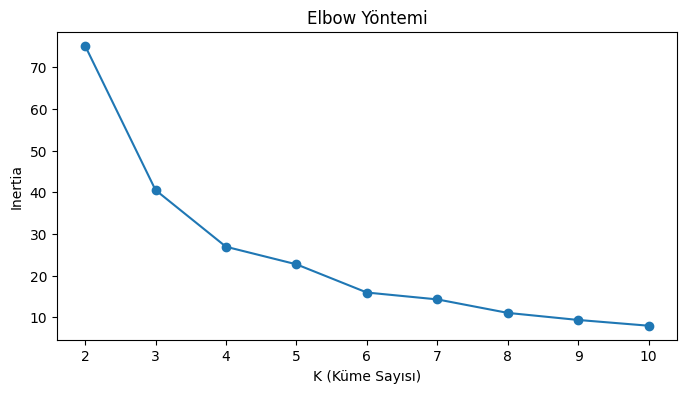

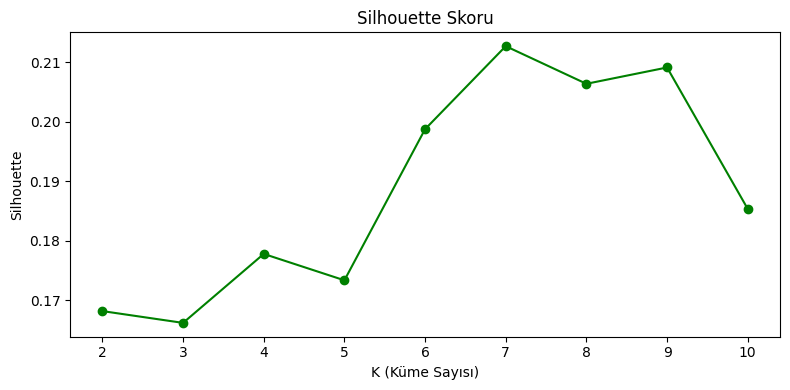

In [32]:
sse = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    km.fit(X_scaled)
    sse.append(km.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, km.labels_))

# Elbow grafiği
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Yöntemi')
plt.xlabel('K (Küme Sayısı)')
plt.ylabel('Inertia')

# Silhouette grafiği
plt.figure(figsize=(8, 4))
plt.plot(K, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Skoru')
plt.xlabel('K (Küme Sayısı)')
plt.ylabel('Silhouette')

plt.tight_layout()
plt.show()

In [33]:
k_final = 6 # Elbow grafiğine göre belirle
kmeans = KMeans(n_clusters=k_final, random_state=42, n_init="auto")
df_musteri['Küme'] = kmeans.fit_predict(X_scaled)

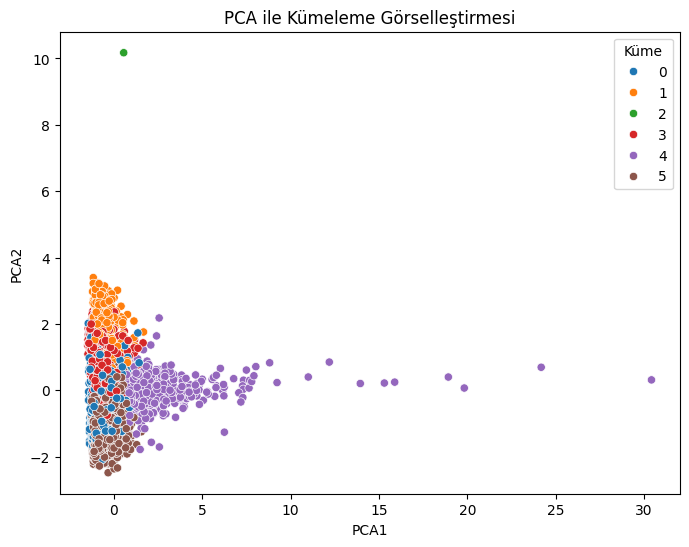

In [34]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_musteri['PCA1'] = X_pca[:, 0]
df_musteri['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_musteri, x='PCA1', y='PCA2', hue='Küme', palette='tab10')
plt.title("PCA ile Kümeleme Görselleştirmesi")
plt.show()

In [35]:
df_musteri.loc[df_musteri["Küme"] == 0, "Segment"] = "Yeni ve Orta Segment"
df_musteri.loc[df_musteri["Küme"] == 1, "Segment"] = "Sık Ama Düşük Harcayan"
df_musteri.loc[df_musteri["Küme"] == 2, "Segment"] = "VIP Müşteri"
df_musteri.loc[df_musteri["Küme"] == 3, "Segment"] = "Dengeli Segment"
df_musteri.loc[df_musteri["Küme"] == 4, "Segment"] = "Riskli Ama Çok Harcayan"
df_musteri.loc[df_musteri["Küme"] == 5, "Segment"] = "Pasif Müşteri"



In [36]:
df_musteri.to_csv("../tables/df_clustered.csv", index=False)

In [37]:
df = df.merge(df_musteri[["MusteriID", "Segment"]], on="MusteriID", how="left")
df = df.merge(df_musteri[["MusteriID", "Küme"]], on="MusteriID", how="left")
df = df.merge(df_musteri[["MusteriID", "MusteriYasi"]], on="MusteriID", how="left")
df = df.merge(df_musteri[["MusteriID", "PasifOlunanSure"]], on="MusteriID", how="left")

# clustering'deki MusteriID, UrunAdi ve kategori sütunlarını kullanarak eşleştir
kategori_map = clustering.drop_duplicates(subset=["MusteriID", "UrunAdi"])[["MusteriID", "UrunAdi", "kategori"]]

# df ile merge ederek Kategori sütunu ekle
df = df.merge(
    kategori_map,
    on=["MusteriID", "UrunAdi"],
    how="left"
).rename(columns={"kategori": "Kategori"})

In [41]:
df.loc[df["UrunTipi"] == "Oyuncak", "Gorsel"] = "https://i.ibb.co/pv40g216/oyuncak.png"
df.loc[df["UrunTipi"] == "Mandallı Fotoğraf Teli", "Gorsel"] = "https://i.ibb.co/PZkv0kjn/mandall-fotog-rafteli.png"
df.loc[df["UrunTipi"] == "Figür", "Gorsel"] = "https://i.ibb.co/k6WZMz45/figu-r.png"
df.loc[df["UrunTipi"] == "Mandala Boyama Kitabı", "Gorsel"] = "https://i.ibb.co/yB4XwLm7/mandalaboyamakitab.png"
df.loc[df["UrunTipi"] == "Mini Dikiş Makinesi", "Gorsel"] = "https://i.ibb.co/ynVh1ydn/minidikis-makinesi.png"
df.loc[df["UrunTipi"] == "Ahşap Dekoratif Harf", "Gorsel"] = "https://i.ibb.co/B22Dn52j/ahs-apdekoratifharf.png"
df.loc[df["UrunTipi"] == "Poster", "Gorsel"] = "https://i.ibb.co/C31QXdpF/poster.png"
df.loc[df["UrunTipi"] == "Tablo", "Gorsel"] = "https://i.ibb.co/DHvRQ8QT/tablo.png"
df.loc[df["UrunTipi"] == "Kar Küresi", "Gorsel"] = "https://i.ibb.co/xKgL0RcB/karku-resi.png"
df.loc[df["UrunTipi"] == "Yılbaşı Süslemesi", "Gorsel"] = "https://i.ibb.co/fVTPYbJW/y-lbas-su-slemesi.png"
df.loc[df["UrunTipi"] == "Tüy Dökücü", "Gorsel"] = "https://i.ibb.co/SXp8j7qd/resim.png"
df.loc[df["UrunTipi"] == "Mini Nemlendirici", "Gorsel"] = "https://i.ibb.co/BHsBPrfD/mininemlendirici.png"
df.loc[df["UrunTipi"] == "Silikon Yüz Temizleme Aparatı", "Gorsel"] = "https://i.ibb.co/BKsxqpNk/silikonyu-ztemizlemeaparat.png"
df.loc[df["UrunTipi"] == "Süngerli Makyaj Temizleyici", "Gorsel"] = "https://i.ibb.co/DHbL5GLd/su-ngerliyu-ztemizleyici.png"
df.loc[df["UrunTipi"] == "Simli Eyeliner", "Gorsel"] = "https://i.ibb.co/kgd3w90Z/simlieyeliner.png"
df.loc[df["UrunTipi"] == "Saç Kurutma Bonesi", "Gorsel"] = "https://i.ibb.co/wZfDcJkP/sac-kurutmabonesi.png"
df.loc[df["UrunTipi"] == "Lens", "Gorsel"] = "https://i.ibb.co/dsFhzw3m/lens.png"
df.loc[df["UrunTipi"] == "Parlak Dudak Balmı", "Gorsel"] = "https://i.ibb.co/mCz6gZxv/parlakdudakbalm.png"
df.loc[df["UrunTipi"] == "Makyaj Süngeri", "Gorsel"] = "https://i.ibb.co/bfryTXg/makyajsu-ngeri.png"
df.loc[df["UrunTipi"] == "Sabun", "Gorsel"] = "https://i.ibb.co/5xrGtkGr/sabun.png"
df.loc[df["UrunTipi"] == "Diş Fırçalık", "Gorsel"] = "https://i.ibb.co/5027mLX/s-is-e.png"
df.loc[df["UrunTipi"] == "Eldiven", "Gorsel"] = "https://i.ibb.co/WWFYfcvX/eldiven.png"
df.loc[df["UrunTipi"] == "Kalem", "Gorsel"] = "https://i.ibb.co/HfvTfWkY/kalem.png"
df.loc[df["UrunTipi"] == "Kalemtıraş", "Gorsel"] = "https://i.ibb.co/rRB2KkzV/kalemt-ras.png"
df.loc[df["UrunTipi"] == "Kutu", "Gorsel"] = "https://i.ibb.co/6zB5BRf/kal-p.png"
df.loc[df["UrunTipi"] == "Yapıştırıcı", "Gorsel"] = "https://i.ibb.co/gFZxq79V/yap-s-t-r-c.png"
df.loc[df["UrunTipi"] == "Defter", "Gorsel"] = "https://i.ibb.co/4n7SJ9z5/defter.png"
df.loc[df["UrunTipi"] == "Günlük Ajanda", "Gorsel"] = "https://i.ibb.co/pjGZGzpF/gu-nlu-kajanda.png"
df.loc[df["UrunTipi"] == "Mini Notluk", "Gorsel"] = "https://i.ibb.co/yFWnDqV8/mininotluk.png"
df.loc[df["UrunTipi"] == "Zımbasız Zımba", "Gorsel"] = "https://i.ibb.co/PvThPt3f/z-mbas-zz-mba.png"
df.loc[df["UrunTipi"] == "Çıkartma", "Gorsel"] = "https://i.ibb.co/YF2GD9PY/c-kartma.png"
df.loc[df["UrunTipi"] == "Sticker", "Gorsel"] = "https://i.ibb.co/Q7kVB42k/sticker.png"
df.loc[df["UrunTipi"] == "Mini Katlanabilir Makas", "Gorsel"] = "https://i.ibb.co/zTp0qvsk/minikatlanabilirmakas.png"
df.loc[df["UrunTipi"] == "Şeffaf Kalemlik", "Gorsel"] = "https://i.ibb.co/XxkFFXrh/s-effafkalemlik.png"
df.loc[df["UrunTipi"] == "Kağıt", "Gorsel"] = "https://i.ibb.co/spzKgT05/kag-t.png"
df.loc[df["UrunTipi"] == "Dosya Klasörü", "Gorsel"] = "https://i.ibb.co/SwL1GWrL/dosyaklaso-ru.png"
df.loc[df["UrunTipi"] == "Kalemlik", "Gorsel"] = "https://i.ibb.co/fzcRTG1D/kalemlik.png"
df.loc[df["UrunTipi"] == "Organizer", "Gorsel"] = "https://i.ibb.co/gZnb6tPL/organizer.png"
df.loc[df["UrunTipi"] == "Düzenleyici", "Gorsel"] = "https://i.ibb.co/JWW9BnGN/du-zenleyici.png"
df.loc[df["UrunTipi"] == "Takvim", "Gorsel"] = "https://i.ibb.co/PvGXCJFK/takvim.png"
df.loc[df["UrunTipi"] == "Mouse Pad", "Gorsel"] = "https://i.ibb.co/LDC798Kb/mousepad.png"
df.loc[df["UrunTipi"] == "Süs", "Gorsel"] = "https://i.ibb.co/vxrM26Wn/su-s.png"
df.loc[df["UrunTipi"] == "Saat", "Gorsel"] = "https://i.ibb.co/KpHVgnfC/saat.png"
df.loc[df["UrunTipi"] == "Ayna", "Gorsel"] = "https://i.ibb.co/MDtz8Gxh/ayna.png"
df.loc[df["UrunTipi"] == "Duvar Panosu", "Gorsel"] = "https://i.ibb.co/jvwcdbG6/duvarpanosu.png"
df.loc[df["UrunTipi"] == "Dekor", "Gorsel"] = "https://i.ibb.co/8DPHvwT5/dekor.png"
df.loc[df["UrunTipi"] == "Saksı", "Gorsel"] = "https://i.ibb.co/CSJngRJ/s-k.png"
df.loc[df["UrunTipi"] == "Mini Süs Havuzu", "Gorsel"] = "https://i.ibb.co/hFkHkS5J/minisu-shavuzu.png"
df.loc[df["UrunTipi"] == "Çerçeve", "Gorsel"] = "https://i.ibb.co/NgGPppMY/c-erc-eve.png"
df.loc[df["UrunTipi"] == "Tablo", "Gorsel"] = "https://i.ibb.co/DHvRQ8QT/tablo.png"
df.loc[df["UrunTipi"] == "Ahşap Tepsi", "Gorsel"] = "https://i.ibb.co/1GRqKLdj/ahs-aptepsi.png"
df.loc[df["UrunTipi"] == "Ahşap Doku Kağıtlık", "Gorsel"] = "https://i.ibb.co/wTsPYbF/ahs-apdokukag-tl-k.png"
df.loc[df["UrunTipi"] == "Raf", "Gorsel"] = "https://i.ibb.co/SwYCDLss/raf.png"
df.loc[df["UrunTipi"] == "Ahşap Peçetelik", "Gorsel"] = "https://i.ibb.co/CRHrFBW/ahs-appec-etelik.png"
df.loc[df["UrunTipi"] == "Buzdolabı Magneti", "Gorsel"] = "https://i.ibb.co/pjXqKH3k/buzdolab-magneti.png"
df.loc[df["UrunTipi"] == "Aromatik Taş", "Gorsel"] = "https://i.ibb.co/Q7MXN6R2/aromatiktas.png"
df.loc[df["UrunTipi"] == "Mum", "Gorsel"] = "https://i.ibb.co/svbpFVkW/mum.png"
df.loc[df["UrunTipi"] == "Yumuşak Yastık", "Gorsel"] = "https://i.ibb.co/n8L4HfLw/yumus-akyast-k.png"
df.loc[df["UrunTipi"] == "Tatil Temalı Yumuşak Yastık Kılıfı", "Gorsel"] = "https://i.ibb.co/gF6SF8vJ/tatiltemal-yumus-akyast-kk-l-f.png"
df.loc[df["UrunTipi"] == "Bardak", "Gorsel"] = "https://i.ibb.co/v4zCxK20/bardak.png"
df.loc[df["UrunTipi"] == "Şişe", "Gorsel"] = "https://i.ibb.co/5027mLX/s-is-e.png"
df.loc[df["UrunTipi"] == "Kupa", "Gorsel"] = "https://i.ibb.co/sdKgCQbP/kupa.png"
df.loc[df["UrunTipi"] == "Saklama Kavanozu", "Gorsel"] = "https://i.ibb.co/rKtfNnN5/saklamakavanozu.png"
df.loc[df["UrunTipi"] == "Mutfak Zamanlayıcısı", "Gorsel"] = "https://i.ibb.co/NnKP1cYZ/mutfakzamanlay-c-s.png"
df.loc[df["UrunTipi"] == "Silikon Buzluk", "Gorsel"] = "https://i.ibb.co/nsnDvMQK/silikonbuzluk.png"
df.loc[df["UrunTipi"] == "Mutfak Kesme Tahtası", "Gorsel"] = "https://i.ibb.co/FbdfQfw2/mutfakkesmetahtas.png"
df.loc[df["UrunTipi"] == "Cam Pipet", "Gorsel"] = "https://i.ibb.co/9mv8Q8y7/campipet.png"
df.loc[df["UrunTipi"] == "Silikon Kavanoz Kapağı", "Gorsel"] = "https://i.ibb.co/3mTYpRkx/silikonkavanozkapag.png"
df.loc[df["UrunTipi"] == "Kase", "Gorsel"] = "https://i.ibb.co/bgnWLVVL/kase.png"
df.loc[df["UrunTipi"] == "Bulaşık Fırçası", "Gorsel"] = "https://i.ibb.co/1YPnKGcc/bulas-kf-rc-as.png"
df.loc[df["UrunTipi"] == "Pratik Çırpıcı", "Gorsel"] = "https://i.ibb.co/Y4hqmxf4/pratikc-rp-c.png"
df.loc[df["UrunTipi"] == "Bambu Sabunluk", "Gorsel"] = "https://i.ibb.co/T9B2YDY/bambusabunluk.png"
df.loc[df["UrunTipi"] == "Masa Örtüsü", "Gorsel"] = "https://i.ibb.co/xqPWm0RT/masao-rtu-su.png"
df.loc[df["UrunTipi"] == "Runner", "Gorsel"] = "https://i.ibb.co/s9nhGhtD/runner.png"
df.loc[df["UrunTipi"] == "Meyve Baskılı Peçete", "Gorsel"] = "https://i.ibb.co/mrhJRMBF/meyvebask-l-pec-ete.png"
df.loc[df["UrunTipi"] == "Toka", "Gorsel"] = "https://i.ibb.co/Mmz9gWM/toka.png"
df.loc[df["UrunTipi"] == "Taşlı Yüzük", "Gorsel"] = "https://i.ibb.co/vvTfSKgs/tas-l-yu-zu-k.png"
df.loc[df["UrunTipi"] == "Saç Bandı", "Gorsel"] = "https://i.ibb.co/NgPdMG1L/sac-band.png"
df.loc[df["UrunTipi"] == "Bileklik", "Gorsel"] = "https://i.ibb.co/ycc3CyPQ/bileklik.png"
df.loc[df["UrunTipi"] == "Oversize T-Shirt", "Gorsel"] = "https://i.ibb.co/zVttr0LM/oversizetshirt.png"
df.loc[df["UrunTipi"] == "Çorap", "Gorsel"] = "https://i.ibb.co/mCHccD9q/c-orap.png"
df.loc[df["UrunTipi"] == "Çanta", "Gorsel"] = "https://i.ibb.co/v5tWbFm/c-anta.png"
df.loc[df["UrunTipi"] == "Kartlık", "Gorsel"] = "https://i.ibb.co/5xgVYPp5/kartl-k.png"
df.loc[df["UrunTipi"] == "Anahtarlık", "Gorsel"] = "https://i.ibb.co/CK3zrk5f/anahtarl-k.png"
df.loc[df["UrunTipi"] == "Bebek Bandanası", "Gorsel"] = "https://i.ibb.co/20ZysDfh/bebekbandanas.png"
df.loc[df["UrunTipi"] == "Ay Yıldızlı Broş", "Gorsel"] = "https://i.ibb.co/fVLWsDg0/ayy-ld-zl-bros.png"
df.loc[df["UrunTipi"] == "Seyahat Cüzdanı", "Gorsel"] = "https://i.ibb.co/xSkYfH6G/seyehatcu-zdan.png"
df.loc[df["UrunTipi"] == "Evcil Hayvan Mama Kabı", "Gorsel"] = "https://i.ibb.co/kV2HQ8pX/evcilhayvanmamakab.png"
df.loc[df["UrunTipi"] == "Evcil Hayvan Tasması", "Gorsel"] = "https://i.ibb.co/KjsNBtMc/evcilhayvantasmas.png"
df.loc[df["UrunTipi"] == "Kedi Tırmalama Pedi", "Gorsel"] = "https://i.ibb.co/DDhVT1RZ/kedit-rmalamapedi.png"
df.loc[df["UrunTipi"] == "Mini Hoparlör", "Gorsel"] = "https://i.ibb.co/S4p9FPbG/minihoparlo-r.png"
df.loc[df["UrunTipi"] == "Dijital Termometre", "Gorsel"] = "https://i.ibb.co/m527BZTg/dijitaltermometre.png"
df.loc[df["UrunTipi"] == "Mini Tripod", "Gorsel"] = "https://i.ibb.co/7NZw6syk/minitripod.png"
df.loc[df["UrunTipi"] == "Telefon Standı", "Gorsel"] = "https://i.ibb.co/67wBNTqn/telefonstand.png"
df.loc[df["UrunTipi"] == "Poşet", "Gorsel"] = "https://i.ibb.co/fzmN1bvx/pos-et.png"
df.loc[df["UrunTipi"] == "Vantilatör", "Gorsel"] = "https://i.ibb.co/fz9v38QR/vantilato-r.png"
df.loc[df["UrunTipi"] == "Yapışkanlı Kanca", "Gorsel"] = "https://i.ibb.co/Q7gHgmpV/yap-s-kanl-kanca.png"
df.loc[df["UrunTipi"] == "Süpürge", "Gorsel"] = "https://i.ibb.co/Y7Rr4PB3/su-pu-rge.png"
df.loc[df["UrunTipi"] == "Pratik Portatif Askı", "Gorsel"] = "https://i.ibb.co/Qv5cVjQD/pratikportatifask.png"
df.loc[df["UrunTipi"] == "Torba", "Gorsel"] = "https://i.ibb.co/39h8HgT3/torba.png"
df.loc[df["UrunTipi"] == "Ev Terliği", "Gorsel"] = "https://i.ibb.co/0RHCfBz8/evterlig-i.png"
df.loc[df["UrunTipi"] == "Şeffaf Bant", "Gorsel"] = "https://i.ibb.co/nNn45PCZ/s-effafbant.png"
df.loc[df["UrunTipi"] == "Masaüstü Mini Fan", "Gorsel"] = "https://i.ibb.co/Z1Hzfj9m/masau-stu-minifan.png"
df.loc[df["UrunTipi"] == "Kapı Stoperi", "Gorsel"] = "https://i.ibb.co/NzMWfzY/kap-stoperi.png"
df.loc[df["UrunTipi"] == "Işık", "Gorsel"] = "https://i.ibb.co/SXp8j7qd/resim.png"
df.loc[df["UrunTipi"] == "Lamba", "Gorsel"] = "https://i.ibb.co/p6Ff0Tz1/lamba.png"
df.loc[df["UrunTipi"] == "Set", "Gorsel"] = "https://i.ibb.co/SXp8j7qd/resim.png"
df.loc[df["UrunTipi"] == "Kalıp", "Gorsel"] = "https://i.ibb.co/6zB5BRf/kal-p.png"
df.loc[df["UrunTipi"] == "Tutucu", "Gorsel"] = "https://i.ibb.co/93HJZXR1/tutucu.png"


In [42]:
df.to_csv("../tables/df.csv", index=False)